# 0. 패키지, 글꼴, 데이터 불러오기

In [126]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [191]:
train = pd.read_csv('/content/drive/MyDrive/boostcamp/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/boostcamp/data/test.csv')

In [192]:
light = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 보안등 정보.csv', encoding='cp949')
child = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')
park = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 주차장 정보.csv', encoding='cp949')
cctv = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 CCTV 정보.csv', encoding='cp949')
accident = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/countrywide_accident.csv')

<ipython-input-192-0e8db686af9c>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  light = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 보안등 정보.csv', encoding='cp949')


In [193]:
print(train.shape)
print(test.shape)

(39609, 23)
(10963, 8)


# 1. EDA 및 시각화

In [194]:
train.head(3)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3


In [195]:
test.head(3)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차


In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [197]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


<Axes: >

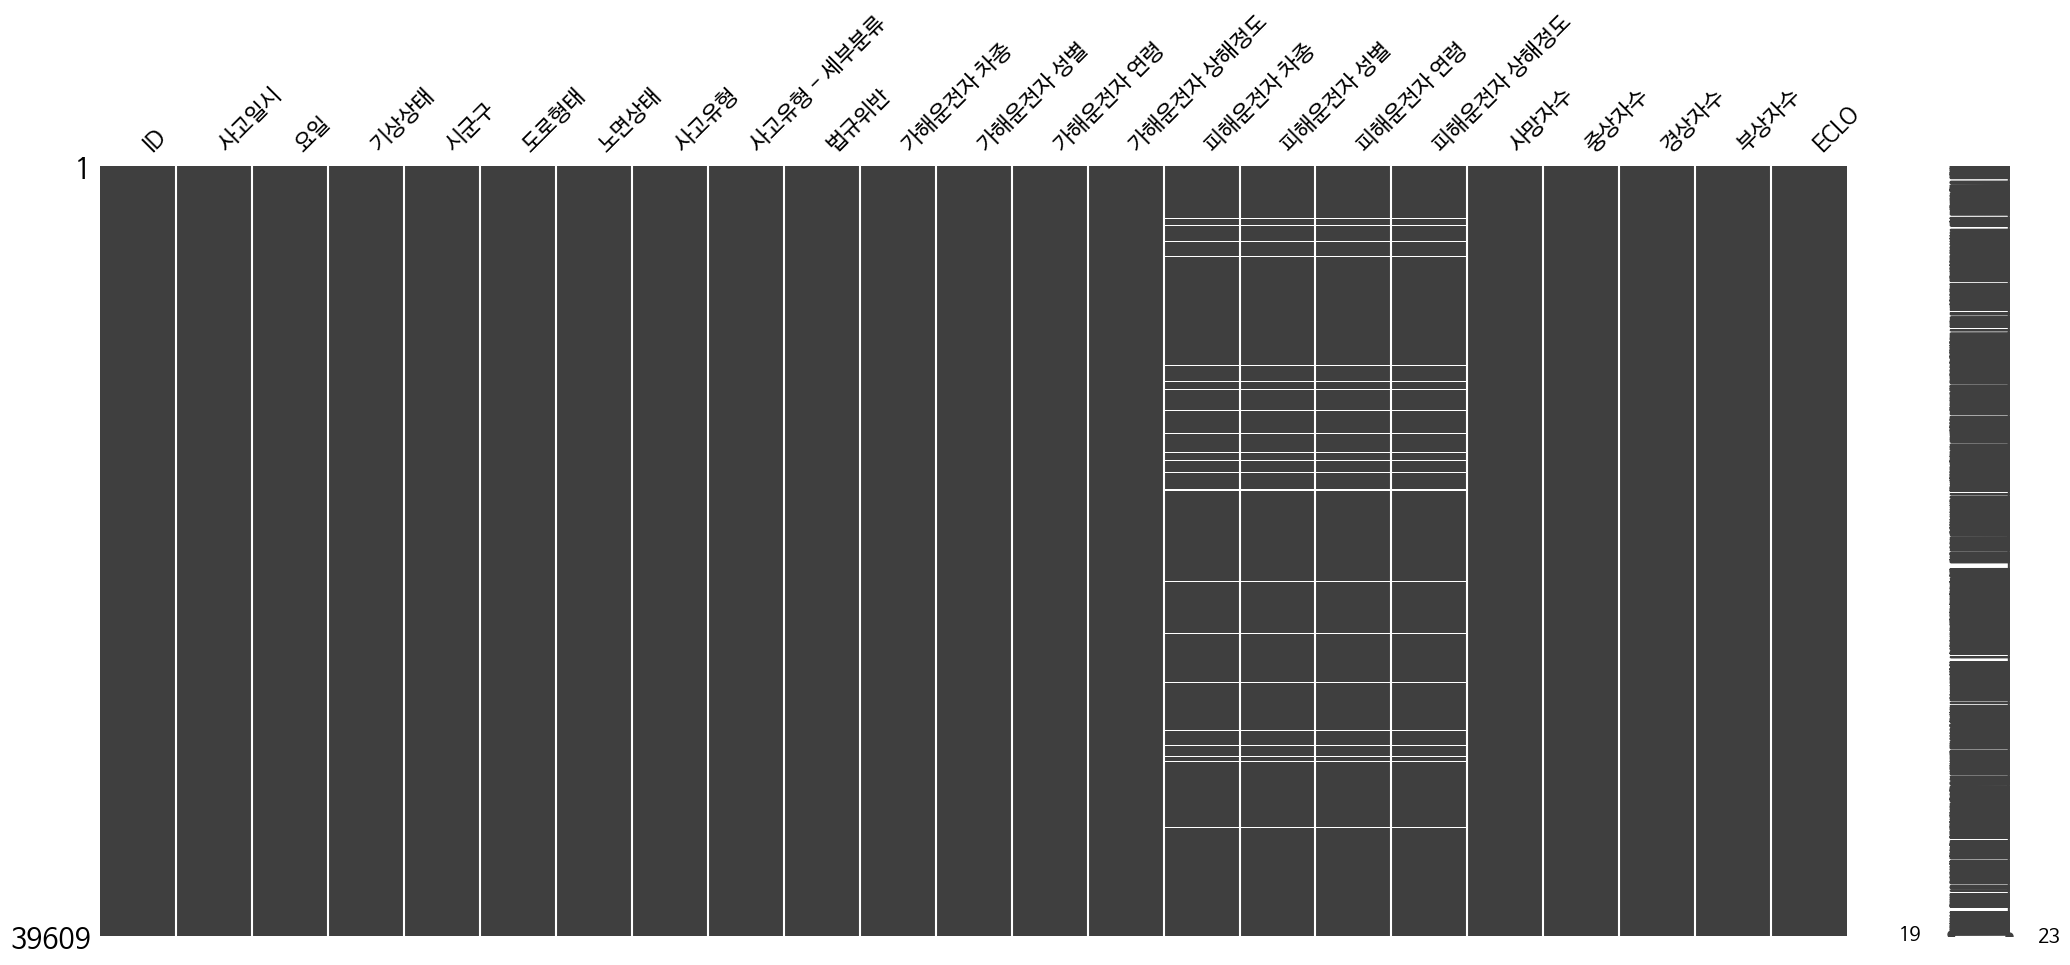

In [198]:
import missingno as msno
msno.matrix(train)

In [199]:
# 결측치
print(train.isna().sum())

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64


In [200]:
train2 = train.copy()

# 결측치 제거
train2 = train2.dropna(subset=['피해운전자 연령','피해운전자 성별','피해운전자 상해정도'])
print(train.shape)
print(train2.shape)

(39609, 23)
(38618, 23)


## 1. train

In [201]:
train2.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000
mean,0.006784,0.260474,1.083847,0.123440,4.745197
std,0.083651,0.499913,0.992847,0.392017,3.197444
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


### target : ECLO
- 인명피해 심각도
- 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

#### (1) ECLO

In [202]:
train2['ECLO'].value_counts()

,count
ECLO,
3,18299
5,6491
6,4929
1,2357
9,1522
8,1134
4,813
12,608
10,566


In [203]:
print(sorted(train2['ECLO'].value_counts().index))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 45, 47, 52, 56, 57, 66, 74]


- 1~74 사이의 정수

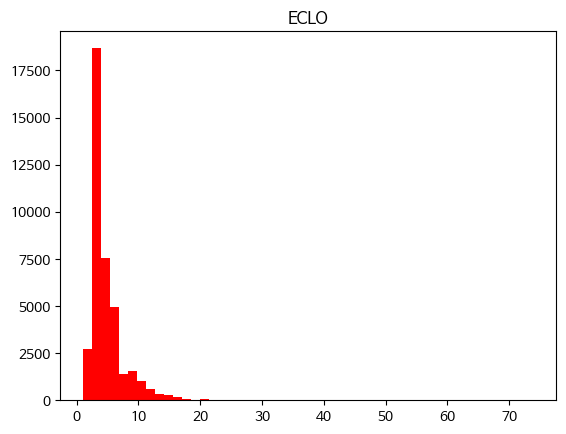

In [204]:
fig, axes = plt.subplots(1,1 )
train['ECLO'].hist(ax = axes, color='red',bins=50)
axes.grid(False)
axes.set_title('ECLO')
plt.show()

- 왼쪽으로 치우친 분포를 가진다.

#### (2) 사망자수, 중상자수, 경상자수, 부상자수

In [205]:
for col in ['사망자수', '중상자수','경상자수', '부상자수']:
  print(train2[col].value_counts())

사망자수
0    38361
1      252
2        5
Name: count, dtype: int64
중상자수
0    29453
1     8437
2      601
3       94
4       28
5        4
6        1
Name: count, dtype: int64
경상자수
1     20502
0      9750
2      5523
3      1722
4       731
5       259
6        77
7        31
8         7
9         7
10        2
14        1
11        1
12        1
15        1
18        1
13        1
22        1
Name: count, dtype: int64
부상자수
0     34425
1      3805
2       275
3        64
4        35
5         9
6         3
7         1
10        1
Name: count, dtype: int64


In [206]:
train2[train2['ECLO']==74]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
32591,ACCIDENT_32591,2021-06-04 14,금요일,맑음,대구광역시 서구 비산동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승합,남,48세,상해없음,0,4,18,0,74


In [207]:
train2[train2['ECLO']==66]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
37536,ACCIDENT_37536,2021-11-01 09,월요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,22세,경상,0,0,22,0,66


### feature

In [208]:
train2.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

#### 사고일시
- object -> datetime -> 월별 시간별로 피처를 추가해야겠다고 생각함

In [209]:
train2['사고일시']

,사고일시
0,2019-01-01 00
1,2019-01-01 00
2,2019-01-01 01
3,2019-01-01 02
4,2019-01-01 04
...,...
39604,2021-12-31 19
39605,2021-12-31 19
39606,2021-12-31 21
39607,2021-12-31 22


In [210]:
train2['사고일시'] = pd.to_datetime(train2['사고일시'])
print(train2['사고일시'].dtype)

datetime64[ns]


In [211]:
train2['사고일시']

,사고일시
0,2019-01-01 00:00:00
1,2019-01-01 00:00:00
2,2019-01-01 01:00:00
3,2019-01-01 02:00:00
4,2019-01-01 04:00:00
...,...
39604,2021-12-31 19:00:00
39605,2021-12-31 19:00:00
39606,2021-12-31 21:00:00
39607,2021-12-31 22:00:00


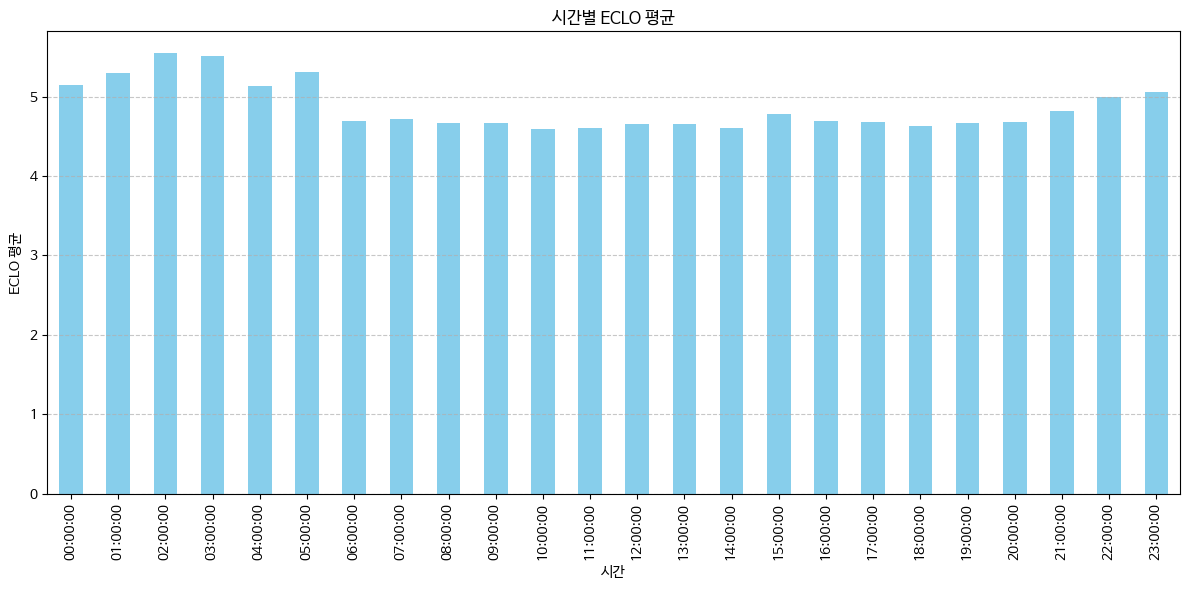

In [212]:
plt.figure(figsize=(12, 6))
train2.groupby(train2['사고일시'].dt.time.astype(str))['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('시간')
plt.ylabel('ECLO 평균')
plt.title('시간별 ECLO 평균')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-213-69620caa3438>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train2.groupby('시간대')['ECLO'].mean().plot(kind='bar', color='skyblue')


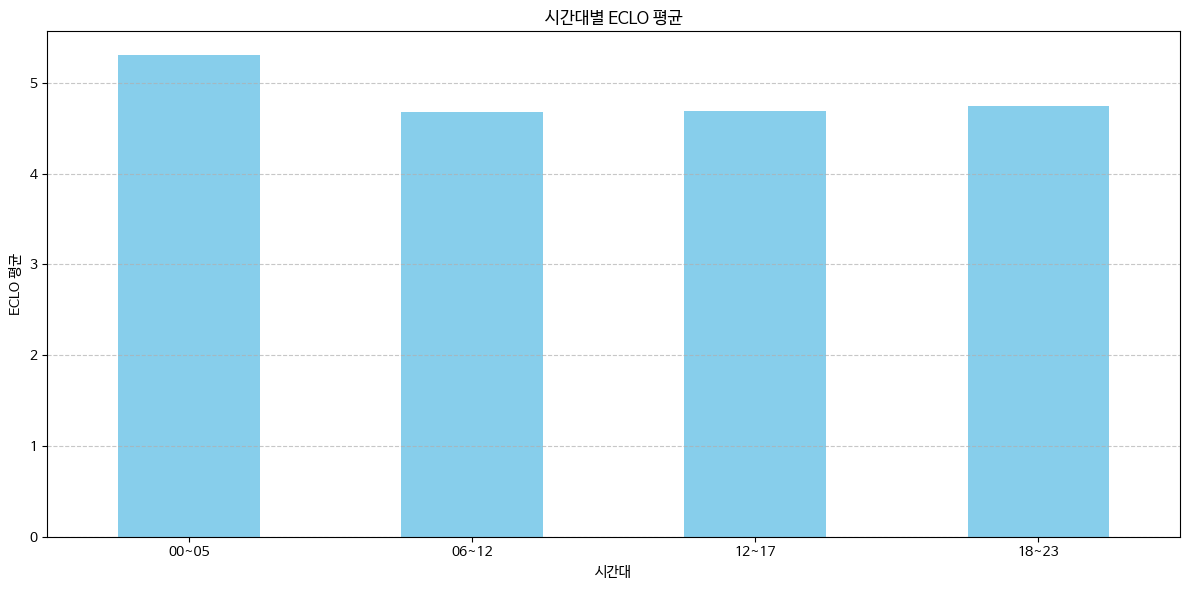

In [213]:
# 시간 구간 정의
bins = [0, 5, 13, 17, 24]
labels = ['00~05', '06~12', '12~17', '18~23']
train2['시간대'] = pd.cut(train2['사고일시'].dt.hour, bins=bins, labels=labels, right=False)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
train2.groupby('시간대')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('시간대')
plt.ylabel('ECLO 평균')
plt.title('시간대별 ECLO 평균')
plt.xticks(rotation=0)  # x축 레이블을 수평으로
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


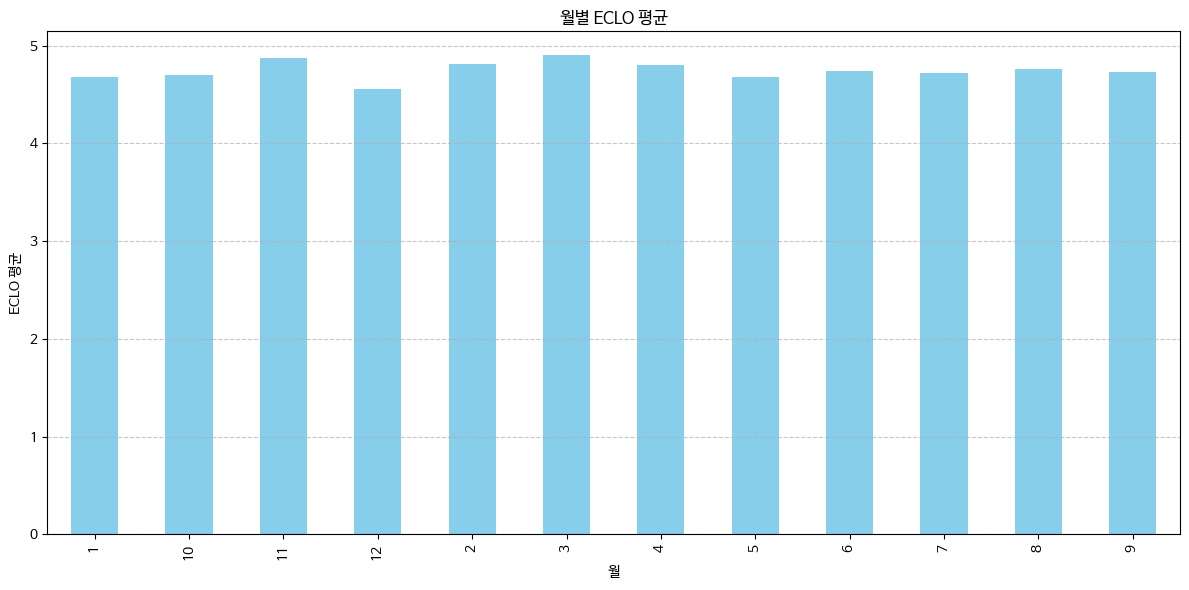

In [214]:
plt.figure(figsize=(12, 6))
train2.groupby(train2['사고일시'].dt.month.astype(str))['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('월')
plt.ylabel('ECLO 평균')
plt.title('월별 ECLO 평균')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

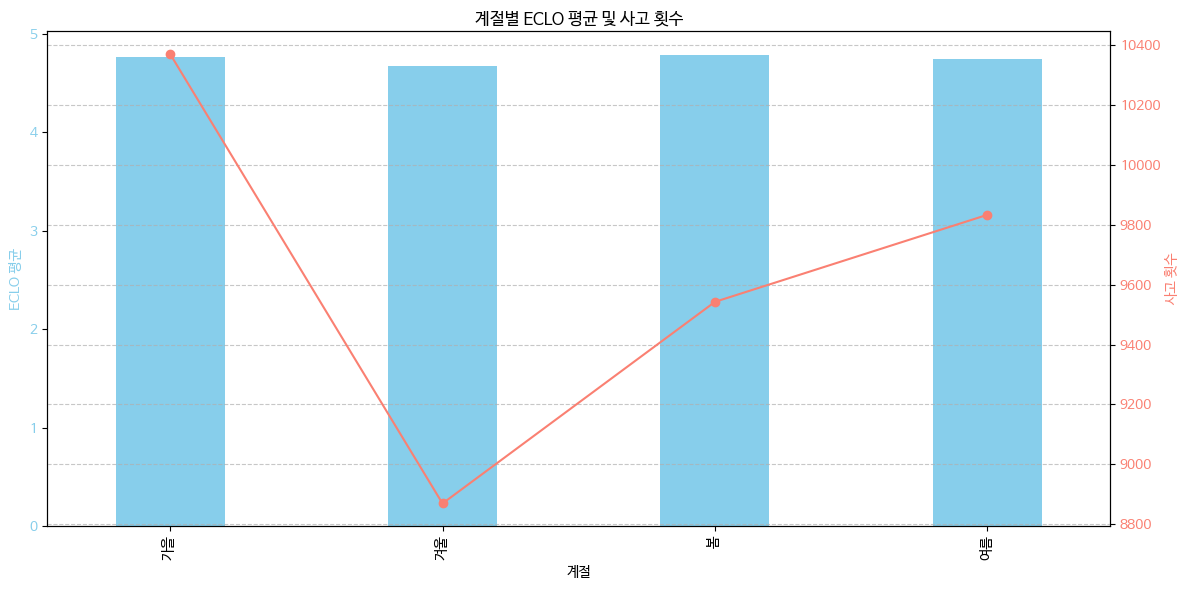

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'

train2['계절'] = train2['사고일시'].dt.month.map(get_season)

seasonal_mean = train2.groupby('계절')['ECLO'].mean()
seasonal_counts = train2.groupby('계절').size()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'skyblue'
ax1.set_xlabel('계절')
ax1.set_ylabel('ECLO 평균', color=color)
seasonal_mean.plot(kind='bar', color=color, ax=ax1, position=0.5, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('계절별 ECLO 평균 및 사고 횟수')

ax2 = ax1.twinx()
color = 'salmon'
ax2.set_ylabel('사고 횟수', color=color)
seasonal_counts.plot(kind='line', color=color, marker='o', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 새벽 사고가 많다!

#### 요일

  - 요일에 따른 사고 수의 차이는 크지 않다.
  - 일요일의 사고 수에 비해 ECLO 값은 크다
  - 추가 변수(일요일인지아닌지) 정도만 사용하면 좋을 것 같다...는 생각....

In [216]:
train2['요일'].value_counts()

,count
요일,
금요일,6026
화요일,5885
수요일,5832
월요일,5754
목요일,5631
토요일,5506
일요일,3984


In [217]:
train2.groupby('요일')[['ECLO','사망자수', '중상자수', '경상자수', '부상자수']].mean()

,ECLO,사망자수,중상자수,경상자수,부상자수
요일,,,,,
금요일,4.621806,0.007136,0.248921,1.061401,0.121640
목요일,4.578050,0.005328,0.258569,1.035340,0.125910
수요일,4.652263,0.005487,0.260631,1.058128,0.119856
월요일,4.713069,0.008516,0.257560,1.076121,0.111748
일요일,5.220884,0.007279,0.278614,1.207329,0.133032
토요일,4.941882,0.008173,0.267890,1.132038,0.124591
화요일,4.648938,0.005777,0.257604,1.057604,0.130331


In [218]:
train2.groupby('요일')['ECLO'].count()

,ECLO
요일,
금요일,6026
목요일,5631
수요일,5832
월요일,5754
일요일,3984
토요일,5506
화요일,5885


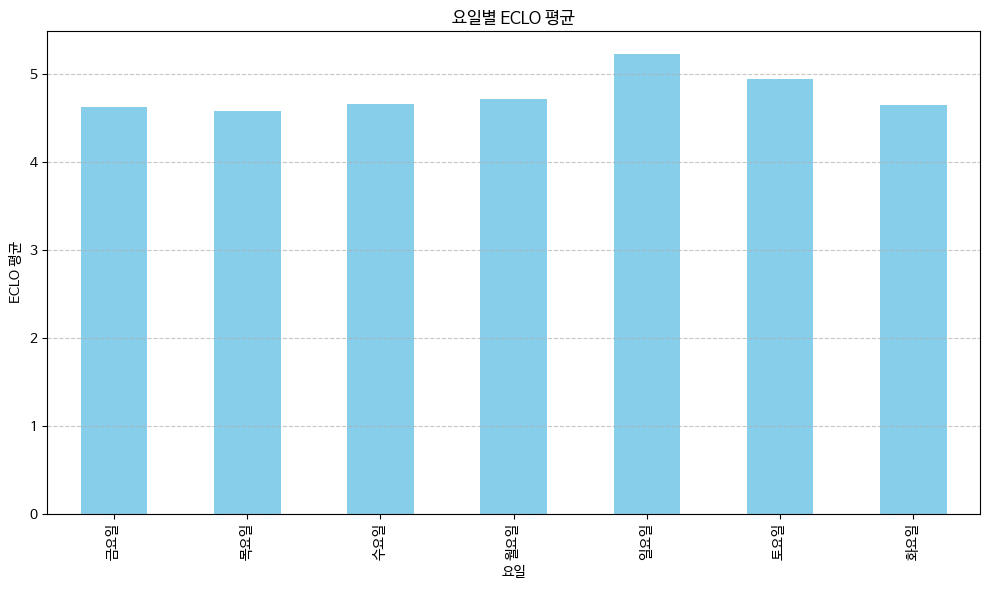

In [219]:
plt.figure(figsize=(10, 6))
train2.groupby('요일')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('요일')
plt.ylabel('ECLO 평균')
plt.title('요일별 ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 일요일 사고가 많다

#### 기상상태

In [220]:
train2['기상상태'].value_counts()

,count
기상상태,
맑음,35328
비,2512
흐림,709
기타,55
안개,8
눈,6


In [221]:
train2.groupby('기상상태')[['ECLO','사망자수', '중상자수', '경상자수', '부상자수']].mean()

,ECLO,사망자수,중상자수,경상자수,부상자수
기상상태,,,,,
기타,5.018182,0.018182,0.400000,0.909091,0.109091
눈,4.333333,0.000000,0.166667,1.166667,0.000000
맑음,4.729874,0.006454,0.257501,1.084494,0.124349
비,4.929140,0.011146,0.287022,1.089172,0.115048
안개,5.500000,0.000000,0.125000,1.625000,0.000000
흐림,4.830748,0.007052,0.306065,1.039492,0.111425


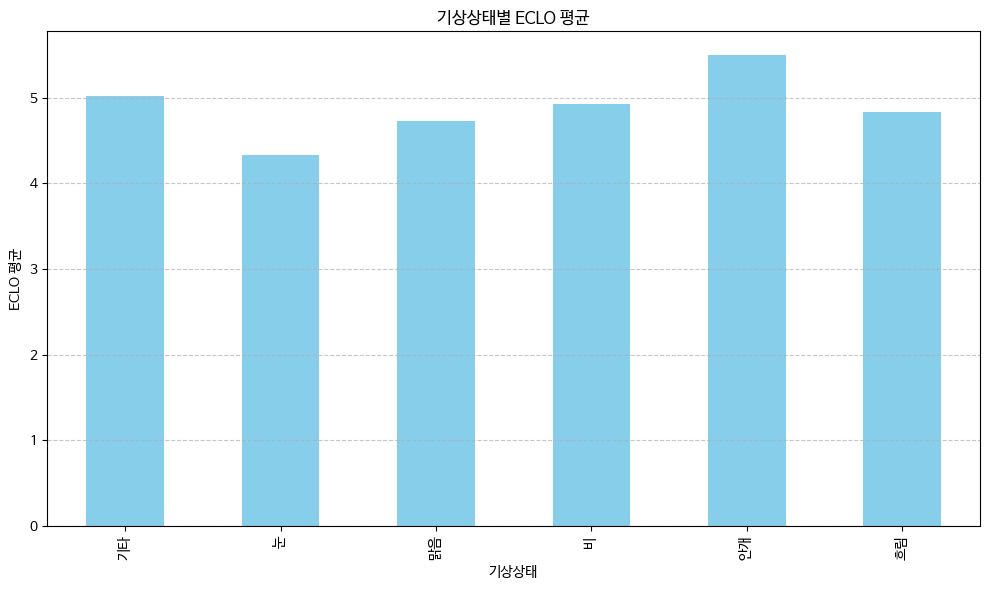

In [222]:
plt.figure(figsize=(10, 6))
train2.groupby('기상상태')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('기상상태')
plt.ylabel('ECLO 평균')
plt.title('기상상태별 ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 시군구
  - 대구광역시 ㅇㅇ구 ㅇㅇ동
  - 대구광역시 ㅇㅇ구 ㅇㅇ가

-> 다른 데이터와 결합할 수 있겠다!

In [223]:
train2['시군구']

,시군구
0,대구광역시 중구 대신동
1,대구광역시 달서구 감삼동
2,대구광역시 수성구 두산동
3,대구광역시 북구 복현동
4,대구광역시 동구 신암동
...,...
39604,대구광역시 수성구 수성동3가
39605,대구광역시 달서구 상인동
39606,대구광역시 달서구 월성동
39607,대구광역시 달서구 장동


In [224]:
train2['구'], train2['읍면동리'] = train2['시군구'].str.split(' ').str[1], train2['시군구'].str.split(' ').str[2]

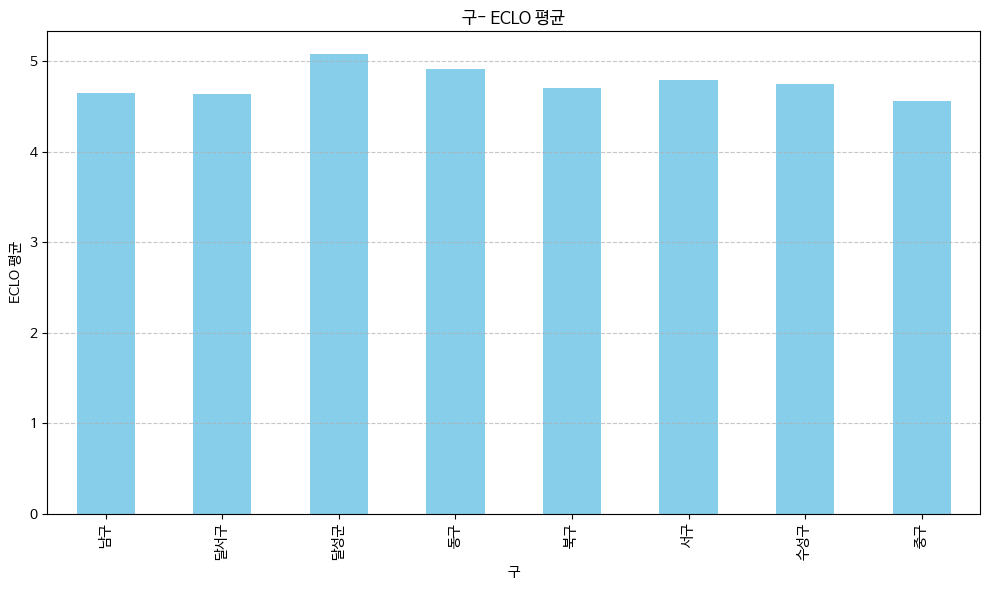

In [225]:
plt.figure(figsize=(10, 6))
train2.groupby('구')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('구')
plt.ylabel('ECLO 평균')
plt.title('구- ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 구는 너무 많아서 빼도 될 거 같기도...

#### 도로형태
- ㅇㅇ로 - ㅇㅇ

In [226]:
train2['도로형태']

,도로형태
0,단일로 - 기타
1,단일로 - 기타
2,단일로 - 기타
3,단일로 - 기타
4,단일로 - 기타
...,...
39604,교차로 - 교차로안
39605,단일로 - 기타
39606,교차로 - 교차로안
39607,기타 - 기타


In [227]:
train2['도로형태'].str.split('-', expand=True)[0].value_counts()

,count
0,
단일로,19523
교차로,16941
기타,1921
주차장,226
미분류,7


In [228]:
train2['도로형태'].str.split('-', expand=True)[1].value_counts()

,count
1,
기타,20735
교차로안,9835
교차로부근,5637
교차로횡단보도내,1469
지하차도(도로)내,295
주차장,226
교량,223
고가도로위,131
터널,60


In [229]:
train2[['도로형태_1', '도로형태_2']] = train2['도로형태'].str.split('-', expand=True)

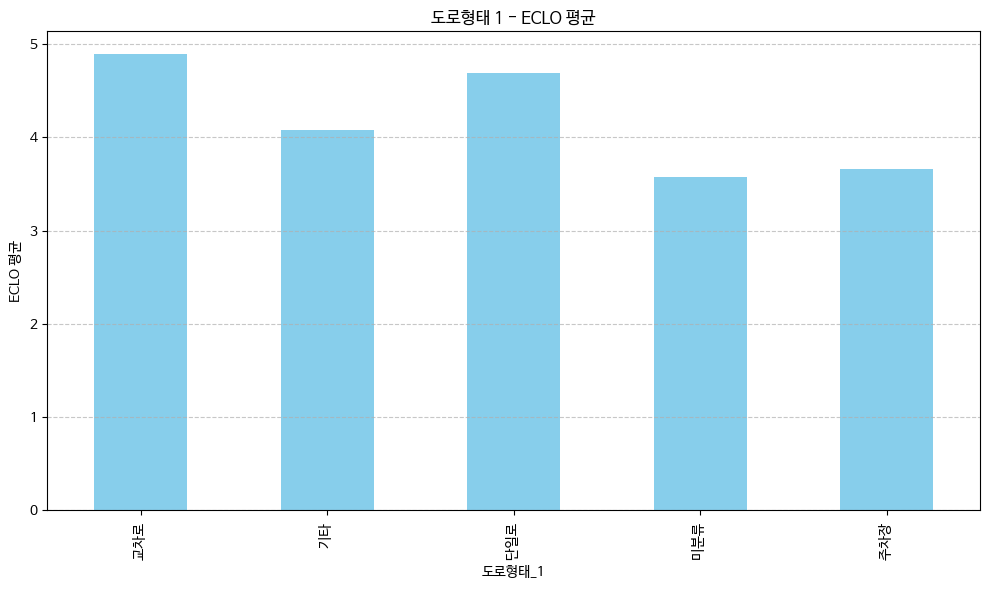

In [230]:
plt.figure(figsize=(10, 6))
train2.groupby('도로형태_1')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('도로형태_1')
plt.ylabel('ECLO 평균')
plt.title('도로형태 1 - ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

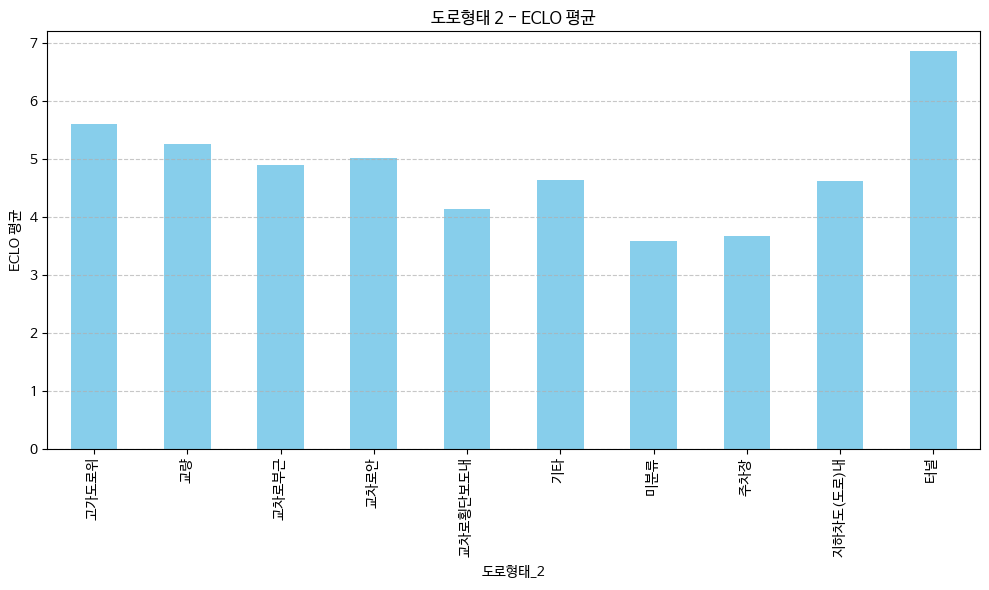

In [231]:
plt.figure(figsize=(10, 6))
train2.groupby('도로형태_2')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('도로형태_2')
plt.ylabel('ECLO 평균')
plt.title('도로형태 2 - ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 노면상태
- 기상과 날짜와 연관이 있을 거라 예상

In [232]:
train2['노면상태'].value_counts()

,count
노면상태,
건조,35580
젖음/습기,2964
기타,50
서리/결빙,19
적설,3
침수,2


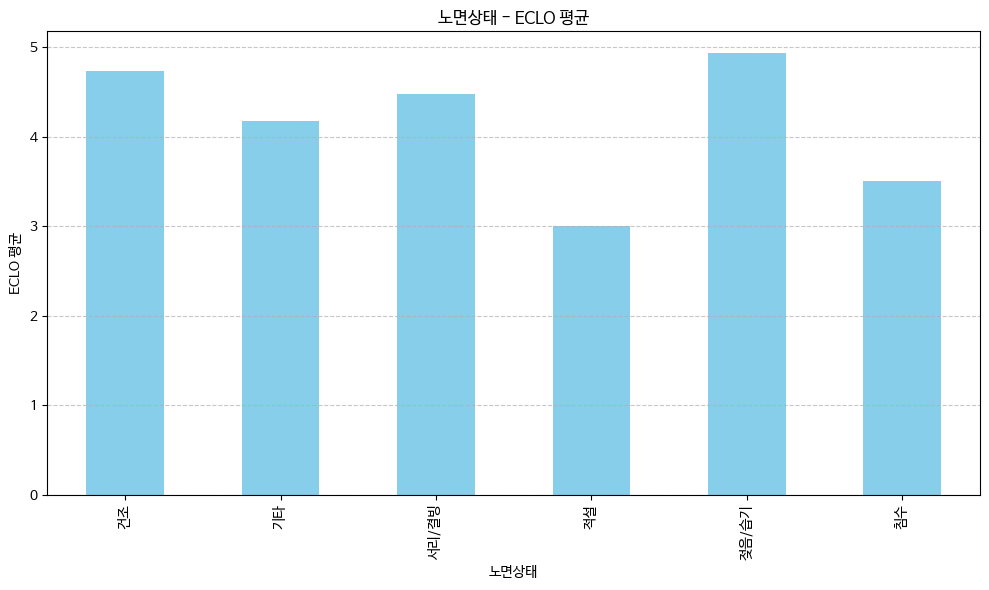

In [233]:
plt.figure(figsize=(10, 6))
train2.groupby('노면상태')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('노면상태')
plt.ylabel('ECLO 평균')
plt.title('노면상태 - ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 사고 유형

In [234]:
train2['사고유형'].value_counts()

,count
사고유형,
차대차,31785
차대사람,6833


In [235]:
train2['사고유형 - 세부분류'].value_counts()
# 전도전복 / 도로외이탈은 합쳐도 될 거 같다고 생각함

,count
사고유형 - 세부분류,
측면충돌,17104
기타,10129
추돌,5885
횡단중,2443
정면충돌,837
차도통행중,616
후진중충돌,613
보도통행중,524
길가장자리구역통행중,467


In [236]:
train2.groupby('사고유형')['ECLO'].mean()

,ECLO
사고유형,
차대사람,3.817650
차대차,4.944597


In [237]:
train2.groupby('사고유형 - 세부분류')['ECLO'].mean()

,ECLO
사고유형 - 세부분류,
기타,4.252542
길가장자리구역통행중,3.152034
보도통행중,3.786260
정면충돌,5.540024
차도통행중,3.907468
추돌,5.572812
측면충돌,4.918557
횡단중,4.227589
후진중충돌,3.955954


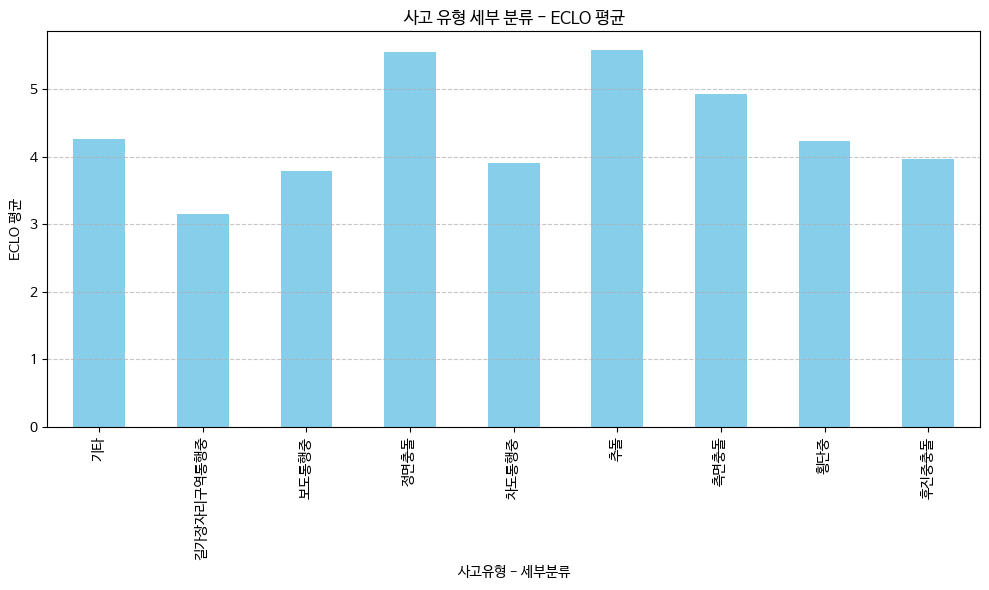

In [238]:
plt.figure(figsize=(10, 6))
train2.groupby('사고유형 - 세부분류')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('사고유형 - 세부분류')
plt.ylabel('ECLO 평균')
plt.title('사고 유형 세부 분류 - ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 법규 위반

In [239]:
train2['법규위반'].value_counts()

,count
법규위반,
안전운전불이행,21023
안전거리미확보,5268
신호위반,3785
교차로운행방법위반,2747
기타,1284
보행자보호의무위반,1154
직진우회전진행방해,979
차로위반,949
중앙선침범,880


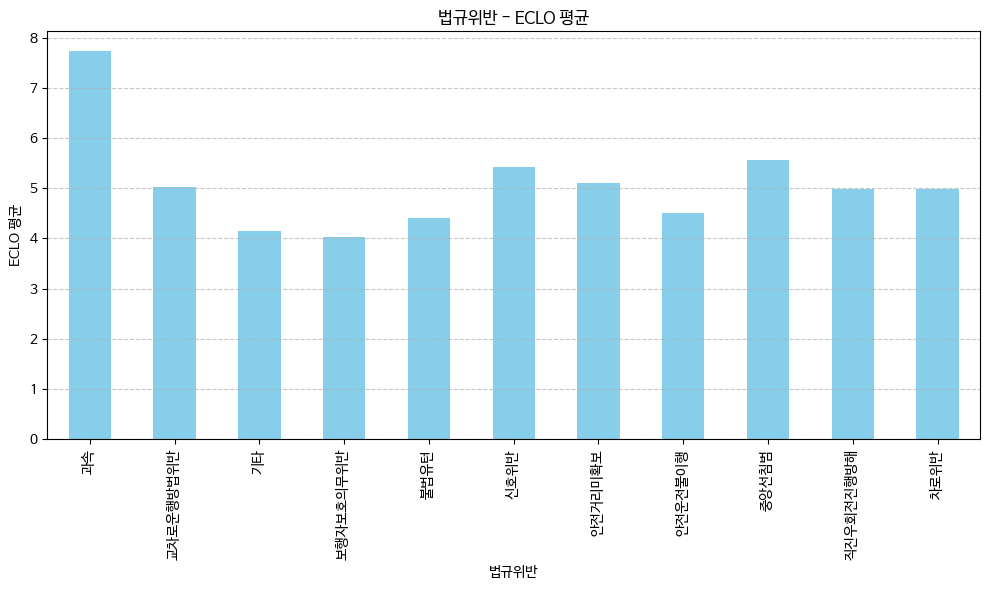

In [240]:
plt.figure(figsize=(10, 6))
train2.groupby('법규위반')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('법규위반')
plt.ylabel('ECLO 평균')
plt.title('법규위반 - ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 차종
- 위에서 나온 차대사람이 꽤 있음을 볼 수 있다.
- 어디에 활용할 지는 모르겠다..

In [241]:
train2['가해운전자 차종'].value_counts()

,count
가해운전자 차종,
승용,26323
화물,4003
이륜,3855
자전거,1172
승합,1166
기타불명,968
원동기,429
건설기계,422
개인형이동수단(PM),156


In [242]:
train2['피해운전자 차종'].value_counts()

,count
피해운전자 차종,
승용,20315
보행자,6833
이륜,5209
자전거,2145
화물,2047
승합,1015
원동기,581
개인형이동수단(PM),164
건설기계,120


In [243]:
train2[['가해운전자 차종', '피해운전자 차종']].value_counts()

가해운전자 차종     피해운전자 차종   
승용           승용             13892
             보행자             4392
             이륜              3985
이륜           승용              2314
화물           승용              2044
                            ...  
기타불명         특수                 1
사륜오토바이(ATV)  화물                 1
특수           개인형이동수단(PM)        1
             원동기                1
기타불명         사륜오토바이(ATV)        1
Name: count, Length: 117, dtype: int64

In [244]:
train2.groupby('가해운전자 차종')['ECLO'].mean()

,ECLO
가해운전자 차종,
개인형이동수단(PM),3.403846
건설기계,5.303318
기타불명,2.739669
농기계,3.333333
사륜오토바이(ATV),3.111111
승용,4.921893
승합,4.956261
원동기,4.086247
이륜,4.297017


In [245]:
train2.groupby('피해운전자 차종')['ECLO'].mean()

,ECLO
피해운전자 차종,
개인형이동수단(PM),3.914634
건설기계,4.525000
기타불명,2.965116
농기계,7.000000
보행자,3.817650
사륜오토바이(ATV),5.045455
승용,5.267782
승합,6.016749
원동기,3.960413


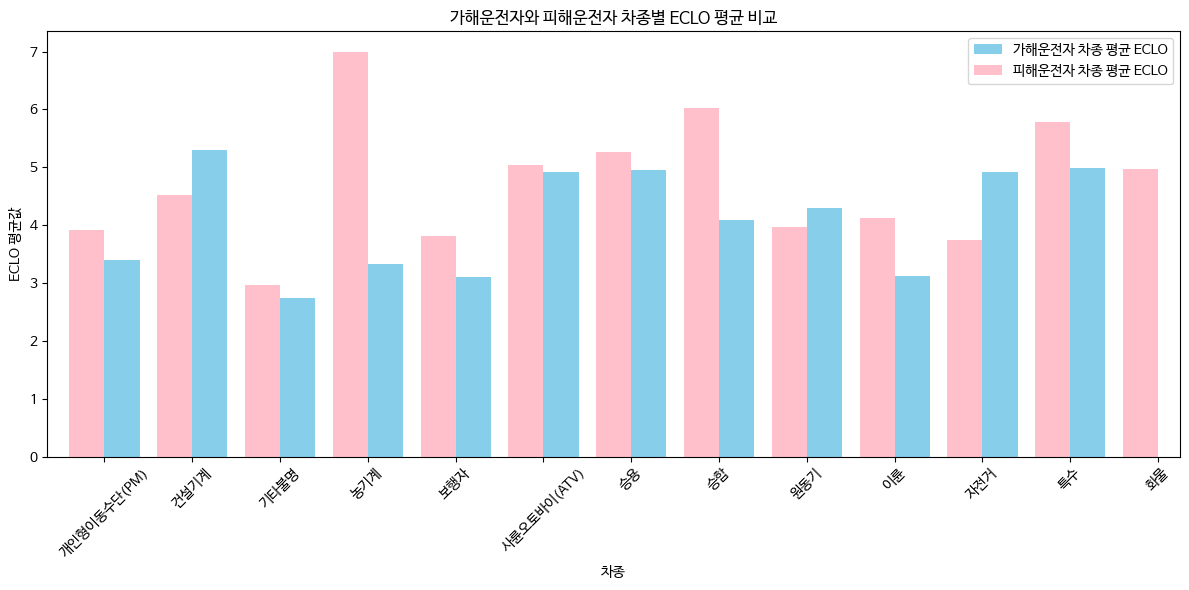

In [246]:
mean_ec_affected = train2.groupby('가해운전자 차종')['ECLO'].mean()
mean_ec_victimized = train2.groupby('피해운전자 차종')['ECLO'].mean()

fig, ax = plt.subplots(figsize=(12, 6))

mean_ec_affected.plot(kind='bar', ax=ax, position=0, width=0.4, color='skyblue', label='가해운전자 차종 평균 ECLO')
mean_ec_victimized.plot(kind='bar', ax=ax, position=1, width=0.4, color='pink', label='피해운전자 차종 평균 ECLO')

ax.set_title('가해운전자와 피해운전자 차종별 ECLO 평균 비교')
ax.set_xlabel('차종')
ax.set_ylabel('ECLO 평균값')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 성별

In [247]:
train2[['가해운전자 성별', '피해운전자 성별']].value_counts()

가해운전자 성별  피해운전자 성별
남         남           20333
          여            7805
여         남            6545
          여            2895
기타불명      남             627
          여             348
남         기타불명           51
여         기타불명           10
기타불명      기타불명            4
Name: count, dtype: int64

#### 연령

In [248]:
train2['가해운전자 연령'].value_counts()
# 그룹화 고고

,count
가해운전자 연령,
60세,1009
미분류,987
58세,954
53세,932
57세,917
...,...
90세,2
4세,1
90세 이상,1


In [249]:
train2['피해운전자 연령'].value_counts()

,count
피해운전자 연령,
59세,867
57세,844
26세,816
50세,815
58세,809
...,...
91세,4
93세,2
94세,2


In [250]:
# 그룹화

def categorize_age(age):
    if '미분류' in age:
        return '미분류'
    elif '이상' in age:
        return '90대 이상'
    else:
        age = int(age.replace('세', ''))
        if age < 10:
            return '10세 미만'
        elif age < 20:
            return '10대'
        elif age < 30:
            return '20대'
        elif age < 40:
            return '30대'
        elif age < 50:
            return '40대'
        elif age < 60:
            return '50대'
        elif age < 70:
            return '60대'
        elif age < 80:
            return '70대'
        elif age < 90:
            return '80대'
        else:
            return '90대 이상'

train2['가해운전자 연령대'] = train2['가해운전자 연령'].apply(categorize_age)
train2['피해운전자 연령대'] = train2['피해운전자 연령'].apply(categorize_age)

In [251]:
train2['가해운전자 연령대'].value_counts()

,count
가해운전자 연령대,
50대,8802
60대,7166
40대,6620
30대,5502
20대,5356
70대,2573
10대,1163
미분류,987
80대,416


In [252]:
train2['피해운전자 연령대'].value_counts()

,count
피해운전자 연령대,
50대,7732
40대,6927
30대,6749
20대,6650
60대,5543
70대,2101
10대,1798
80대,589
10세 미만,432


In [253]:
train2.groupby('피해운전자 연령대')['ECLO'].mean()

,ECLO
피해운전자 연령대,
10대,4.284761
10세 미만,3.530093
20대,4.670677
30대,4.756557
40대,4.895770
50대,4.779747
60대,4.837272
70대,4.798667
80대,4.696095


In [254]:
train2.groupby('가해운전자 연령대')['ECLO'].mean()

,ECLO
가해운전자 연령대,
10대,4.576956
10세 미만,2.517241
20대,4.884989
30대,4.866776
40대,4.796979
50대,4.778232
60대,4.837427
70대,4.583366
80대,4.579327


## 추가 데이터

### cctv

In [255]:
cctv = pd.read_csv('/content/drive/MyDrive/boostcamp/data/external_open/대구 CCTV 정보.csv', encoding='cp949')

In [256]:
cctv.head(3)

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0


In [257]:
cctv.shape

(1065, 18)

In [258]:
# 결측치
print(cctv.isna().sum())

무인교통단속카메라관리번호       0
시도명                 0
시군구명                0
도로종류                0
도로노선번호            777
도로노선명               0
도로노선방향              0
소재지도로명주소          160
소재지지번주소             2
위도                  0
경도                  0
설치장소                0
단속구분                0
제한속도                0
단속구간위치구분         1012
과속단속구간길이         1039
보호구역구분            172
설치연도                0
dtype: int64


In [259]:
# 단속구간위치구분, 과속단속구간길이 drop
cctv = cctv.drop(['단속구간위치구분', '과속단속구간길이'],axis=1)

# 보호구역구분
cctv.dropna(subset=['보호구역구분'])

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,99.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,H2418,대구광역시,북구,특별시도,NaN,태암남로,1,대구광역시 북구 태암남로 41,대구광역시 북구 구암동 671-8,35.925294,128.552023,구암고교교차로(면허시험장삼거리→구암역),2,40,99.0,2021.0
1061,H2419,대구광역시,북구,특별시도,NaN,내곡로,1,대구광역시 북구 내곡로 90,대구광역시 북구 사수동 812,35.900977,128.513825,사수초교앞(삼영초교→사수중학교),2,30,2.0,2021.0
1062,H4145,대구광역시,북구,특별시도,NaN,대현로,2,대구광역시 북구 대현로 100,대구광역시 북구 대현동 270-8,35.882191,128.609791,신암초교 남측(공고R)(경대교→공고네거리),2,30,2.0,2021.0
1063,H4146,대구광역시,북구,특별시도,NaN,대현로,1,대구광역시 북구 대현로 118,대구광역시 북구 대현동 270-3,35.881737,128.611651,신암초교 남측(경대교)(공고네거리→경대교),2,30,2.0,2021.0


In [260]:
set(cctv['시군구명'])

{'군위군', '남구', '달서구', '달성', '달성군', '동구', '북구', '서구', '수성구', '중구'}

In [261]:
set(train2['구'])

{'남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'}

In [262]:
cctv2 =  cctv.copy()
cctv2 = cctv2[cctv2['시군구명'].isin(set(train2['구']))]
cctv2

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,99.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,H2418,대구광역시,북구,특별시도,NaN,태암남로,1,대구광역시 북구 태암남로 41,대구광역시 북구 구암동 671-8,35.925294,128.552023,구암고교교차로(면허시험장삼거리→구암역),2,40,99.0,2021.0
1061,H2419,대구광역시,북구,특별시도,NaN,내곡로,1,대구광역시 북구 내곡로 90,대구광역시 북구 사수동 812,35.900977,128.513825,사수초교앞(삼영초교→사수중학교),2,30,2.0,2021.0
1062,H4145,대구광역시,북구,특별시도,NaN,대현로,2,대구광역시 북구 대현로 100,대구광역시 북구 대현동 270-8,35.882191,128.609791,신암초교 남측(공고R)(경대교→공고네거리),2,30,2.0,2021.0
1063,H4146,대구광역시,북구,특별시도,NaN,대현로,1,대구광역시 북구 대현로 118,대구광역시 북구 대현동 270-3,35.881737,128.611651,신암초교 남측(경대교)(공고네거리→경대교),2,30,2.0,2021.0


In [263]:
cctv2 = cctv2.dropna(subset=['소재지지번주소'])

In [264]:
def extract_valid_dong(address):
    if not isinstance(address, str):  # address가 문자열이 아닌 경우
        return '기타'
    for dong in set(train2['읍면동리']):
        if dong in address:
            return dong
    return '기타'

cctv2['읍면동리']=cctv2['소재지지번주소'].apply(extract_valid_dong)

<ipython-input-264-425242134edc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctv2['읍면동리']=cctv2['소재지지번주소'].apply(extract_valid_dong)


In [265]:
cctv2 = cctv2[cctv2['읍면동리'] != '기타']
cctv2

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,읍면동리
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,99.0,2010.0,대명동
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,99.0,2013.0,봉덕동
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,99.0,2013.0,봉덕동
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,99.0,2014.0,대명동
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,99.0,2014.0,봉덕동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,H2418,대구광역시,북구,특별시도,NaN,태암남로,1,대구광역시 북구 태암남로 41,대구광역시 북구 구암동 671-8,35.925294,128.552023,구암고교교차로(면허시험장삼거리→구암역),2,40,99.0,2021.0,구암동
1061,H2419,대구광역시,북구,특별시도,NaN,내곡로,1,대구광역시 북구 내곡로 90,대구광역시 북구 사수동 812,35.900977,128.513825,사수초교앞(삼영초교→사수중학교),2,30,2.0,2021.0,수동
1062,H4145,대구광역시,북구,특별시도,NaN,대현로,2,대구광역시 북구 대현로 100,대구광역시 북구 대현동 270-8,35.882191,128.609791,신암초교 남측(공고R)(경대교→공고네거리),2,30,2.0,2021.0,대현동
1063,H4146,대구광역시,북구,특별시도,NaN,대현로,1,대구광역시 북구 대현로 118,대구광역시 북구 대현동 270-3,35.881737,128.611651,신암초교 남측(경대교)(공고네거리→경대교),2,30,2.0,2021.0,대현동


보호구역구분
- 01 : 노인보호구역
- 02 : 어린이보호구역
- 99 : 기타

=> nan 값에 0 부여

In [266]:
cctv2[cctv2['보호구역구분']==1]

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,읍면동리
8,주차20,대구광역시,남구,시도,NaN,앞산순환로,3,대구광역시 남구 앞산순환로 574-87,대구광역시 남구 대명동 산227-5,35.828958,128.589035,앞산공원관리사무소,4,0,1.0,2017.0,대명동
16,주차28,대구광역시,남구,시도,NaN,앞산순환로,3,대구광역시 남구 앞산순환로 574-87,대구광역시 남구 대명동 산227-5,35.828958,128.589035,대덕교 뒤편,4,0,1.0,2018.0,대명동
408,F7808,대구광역시,동구,특별시도,NaN,동촌로,1,대구광역시 동구 동촌로 1,대구광역시 동구 신평동 783-11,35.892345,128.644244,용호네거리(용계삼거리→방촌역),2,60,1.0,2014.0,신평동
924,H0974,대구광역시,달서구,특별시도,5,성당로,2,대구광역시 달서구 성당로 70-2,대구광역시 남구 성당동 151-2,35.843384,128.561788,성당못앞삼거리(두류공원네거리→성당네거리),2,40,1.0,2021.0,성당동
1049,H2407,대구광역시,달서구,특별시도,NaN,선원로,1,대구광역시 달서구 선원로 244-1,대구광역시 달서구 용산동 500,35.858793,128.519342,성서노인종합복지관교차로(불미골네거리→용산지하차도),2,40,1.0,2021.0,용산동


In [267]:
cctv2[cctv2['보호구역구분']==2]

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,읍면동리
18,주차30,대구광역시,남구,시도,NaN,희망로,3,대구광역시 남구 희망로 3길 29,대구광역시 남구 봉덕동 481-11,35.849024,128.599283,봉덕119안전센터 앞 삼거리,4,0,2.0,2018.0,봉덕동
25,주차37,대구광역시,남구,시도,NaN,성당로,3,대구광역시 남구 성당로 250,대구광역시 남구 대명동 2296-29,35.855095,128.574329,대구대입구 전용주차장 앞,4,0,2.0,2019.0,대명동
27,주차39,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 100,대구광역시 남구 대명동 960,35.838870,128.568887,대명초등학교 옆,4,0,2.0,2019.0,대명동
29,주차41,대구광역시,남구,시도,NaN,효성로,3,NaN,대구광역시 남구 봉덕동 1292-40,35.837878,128.599023,봉덕초등학교 앞,4,0,2.0,2020.0,봉덕동
30,주차42,대구광역시,남구,시도,NaN,대봉로,3,"대구광역시 남구 대봉로 120, (이천동)",대구광역시 남구 이천동 258,35.850079,128.603680,대구중학교 앞,4,0,2.0,2020.0,이천동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,H2414,대구광역시,달성군,특별시도,NaN,서재로,2,대구광역시 달성군 다사읍 서재로 113,대구광역시 달성군 다사읍 서재리 106,35.873612,128.497186,서재초교건너(서재보성아파트교차로→서재초등교차로),2,30,2.0,2021.0,다사읍
1057,H2415,대구광역시,달성군,특별시도,NaN,다사로,2,대구광역시 달성군 다사읍 다사로 86,대구광역시 달성군 다사읍 매곡리 457,35.869429,128.458485,다사초교건너(다사초교정문→다사고교),2,30,2.0,2021.0,다사읍
1061,H2419,대구광역시,북구,특별시도,NaN,내곡로,1,대구광역시 북구 내곡로 90,대구광역시 북구 사수동 812,35.900977,128.513825,사수초교앞(삼영초교→사수중학교),2,30,2.0,2021.0,수동
1062,H4145,대구광역시,북구,특별시도,NaN,대현로,2,대구광역시 북구 대현로 100,대구광역시 북구 대현동 270-8,35.882191,128.609791,신암초교 남측(공고R)(경대교→공고네거리),2,30,2.0,2021.0,대현동


In [268]:
cctv2[cctv2['보호구역구분']==99]

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,읍면동리
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,99.0,2010.0,대명동
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,99.0,2013.0,봉덕동
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,99.0,2013.0,봉덕동
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,99.0,2014.0,대명동
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,99.0,2014.0,봉덕동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,H2412,대구광역시,달성군,특별시도,NaN,대실역남로,1,대구광역시 달성군 대실역남로 35,대구광역시 달성군 다사읍 죽곡리 815,35.854315,128.464885,청아람리슈빌4단지아파트(죽곡푸르지오2단지→대실역),2,30,99.0,2021.0,다사읍
1058,H2416,대구광역시,북구,특별시도,NaN,구암로,2,대구광역시 북구 구암로 103,대구광역시 북구 읍내동 1381-14,35.932451,128.552052,관천중학교교차로(칠곡IC)(칠곡운암역→칠곡IC),2,50,99.0,2021.0,내동
1059,H2417,대구광역시,북구,특별시도,NaN,구암로,1,대구광역시 북구 구암로 110,대구광역시 북구 태전동 999,35.931688,128.553033,관천중학교교차로(칠곡운암역)(칠곡IC→칠곡운암역),2,50,99.0,2021.0,전동
1060,H2418,대구광역시,북구,특별시도,NaN,태암남로,1,대구광역시 북구 태암남로 41,대구광역시 북구 구암동 671-8,35.925294,128.552023,구암고교교차로(면허시험장삼거리→구암역),2,40,99.0,2021.0,구암동


In [269]:
cctv2['보호구역구분'] = cctv2['보호구역구분'].fillna(0)

In [270]:
cctv3 = cctv2.copy()
cctv3 = cctv3[['읍면동리','도로종류','단속구분','제한속도','보호구역구분','도로노선방향']]
cctv3

,읍면동리,도로종류,단속구분,제한속도,보호구역구분,도로노선방향
0,대명동,시도,4,0,99.0,3
1,봉덕동,시도,4,0,99.0,3
2,봉덕동,시도,4,0,99.0,3
3,대명동,시도,4,0,99.0,3
4,봉덕동,시도,4,0,99.0,3
...,...,...,...,...,...,...
1060,구암동,특별시도,2,40,99.0,1
1061,수동,특별시도,2,30,2.0,1
1062,대현동,특별시도,2,30,2.0,2
1063,대현동,특별시도,2,30,2.0,1


In [271]:
print(set(cctv3['도로종류']))
print(set(cctv3['단속구분']))
print(set(cctv3['제한속도']))
print(set(cctv3['보호구역구분']))
print(set(cctv3['도로노선방향']))

{'특별시도', '시도', '고속국도', '지방도', '일반국도', '구도'}
{1, 2, 99, 4}
{0, 100, 70, 40, 110, 80, 50, 60, 30}
{0.0, 1.0, 2.0, 99.0}
{1, 2, 3}


In [272]:
cctv3[cctv3['도로종류'] == '고속국도']

,읍면동리,도로종류,단속구분,제한속도,보호구역구분,도로노선방향
342,화원읍,고속국도,1,100,99.0,1
343,금호동,고속국도,1,100,99.0,1
381,평광동,고속국도,99,100,99.0,1
382,도동,고속국도,99,100,99.0,1
431,신평동,고속국도,99,100,99.0,1
432,신평동,고속국도,99,100,99.0,1
433,신평동,고속국도,99,100,99.0,1
434,신평동,고속국도,99,100,99.0,1
435,율암동,고속국도,99,100,99.0,2
436,율암동,고속국도,99,100,99.0,2


In [273]:
## 동별 CCTV 설치 개수
cctv3.groupby('읍면동리').size()

,0
읍면동리,
가창면,9
가천동,1
각산동,2
갈산동,1
감삼동,12
...,...
호림동,5
호산동,10
화원읍,20


In [274]:
# 동별 단속구분	 min max mean
cctv3.groupby('읍면동리')['단속구분'].agg(['min', 'max', 'mean'])

,min,max,mean
읍면동리,,,
가창면,1,2,1.555556
가천동,2,2,2.000000
각산동,1,2,1.500000
갈산동,1,1,1.000000
감삼동,1,4,3.250000
...,...,...,...
호림동,2,4,3.600000
호산동,2,4,2.800000
화원읍,1,99,11.350000


In [275]:
# 동별 보호구역구분	 min max mean
cctv3.groupby('읍면동리')['보호구역구분'].agg(['min', 'max', 'mean'])

,min,max,mean
읍면동리,,,
가창면,2.0,99.0,66.666667
가천동,99.0,99.0,99.000000
각산동,2.0,99.0,50.500000
갈산동,99.0,99.0,99.000000
감삼동,0.0,99.0,25.083333
...,...,...,...
호림동,0.0,99.0,19.800000
호산동,0.0,99.0,30.900000
화원읍,2.0,99.0,69.900000


In [276]:
# 동별 도로노선방향 min max mean
cctv3.groupby('읍면동리')['도로노선방향'].agg(['min', 'max', 'mean'])

,min,max,mean
읍면동리,,,
가창면,1,2,1.333333
가천동,2,2,2.000000
각산동,2,2,2.000000
갈산동,2,2,2.000000
감삼동,1,3,2.416667
...,...,...,...
호림동,1,3,2.600000
호산동,1,3,2.000000
화원읍,1,2,1.550000


In [277]:
# 고속 국도 개수
cctv3[cctv3['도로종류'] == '고속국도'].groupby('읍면동리').size()

,0
읍면동리,
금호동,1
도동,1
방촌동,1
수동,2
신평동,4
옥포읍,1
용계동,1
율암동,4
평광동,1


In [302]:
# 1. CCTV 개수
cctv_count = cctv3.groupby('읍면동리').size().reset_index(name='CCTV_Count')

# 2. 단속구분 통계
speeding_stats = cctv3.groupby('읍면동리')['단속구분'].agg(['min', 'max', 'mean']).reset_index()
speeding_stats.columns = ['읍면동리', 'Speeding_Min', 'Speeding_Max', 'Speeding_Mean']

# 3. 보호구역구분 통계
zone_stats = cctv3.groupby('읍면동리')['보호구역구분'].agg(['min', 'max', 'mean']).reset_index()
zone_stats.columns = ['읍면동리', 'Zone_Min', 'Zone_Max', 'Zone_Mean']

# 4. 도로노선방향 통계
road_direction_stats = cctv3.groupby('읍면동리')['도로노선방향'].agg(['min', 'max', 'mean']).reset_index()
road_direction_stats.columns = ['읍면동리', 'Road_Direction_Min', 'Road_Direction_Max', 'Road_Direction_Mean']

# 5. 고속국도 개수
expressway_count = cctv3[cctv3['도로종류'] == '고속국도'].groupby('읍면동리').size().reset_index(name='Expressway_Count')

# 병합
merged_df = pd.merge(cctv_count, speeding_stats, on='읍면동리', how='left')
merged_df = pd.merge(merged_df, zone_stats, on='읍면동리', how='left')
merged_df = pd.merge(merged_df, road_direction_stats, on='읍면동리', how='left')
merged_df = pd.merge(merged_df, expressway_count, on='읍면동리', how='left')

# 결측값을 0으로 대체
merged_df = merged_df.fillna(0)

merged_df

,읍면동리,CCTV_Count,Speeding_Min,Speeding_Max,Speeding_Mean,Zone_Min,Zone_Max,Zone_Mean,Road_Direction_Min,Road_Direction_Max,Road_Direction_Mean,Expressway_Count
0,가창면,9,1,2,1.555556,2.0,99.0,66.666667,1,2,1.333333,0.0
1,가천동,1,2,2,2.000000,99.0,99.0,99.000000,2,2,2.000000,0.0
2,각산동,2,1,2,1.500000,2.0,99.0,50.500000,2,2,2.000000,0.0
3,갈산동,1,1,1,1.000000,99.0,99.0,99.000000,2,2,2.000000,0.0
4,감삼동,12,1,4,3.250000,0.0,99.0,25.083333,1,3,2.416667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
133,호림동,5,2,4,3.600000,0.0,99.0,19.800000,1,3,2.600000,0.0
134,호산동,10,2,4,2.800000,0.0,99.0,30.900000,1,3,2.000000,0.0
135,화원읍,20,1,99,11.350000,2.0,99.0,69.900000,1,2,1.550000,1.0
136,황금동,9,1,2,1.666667,2.0,99.0,77.444444,1,2,1.333333,0.0


### 합치기

In [278]:
train3 = train2.copy()
cctv_counts = cctv3.groupby('읍면동리').size().reset_index(name='CCTV_개수')
train3 = pd.merge(train3, cctv_counts, on='읍면동리', how='left')
train3['CCTV_개수'].fillna(0).astype(int)
train3

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,ECLO,시간대,계절,구,읍면동리,도로형태_1,도로형태_2,가해운전자 연령대,피해운전자 연령대,CCTV_개수
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,5,00~05,겨울,중구,대신동,단일로,기타,50대,70대,5.0
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,3,00~05,겨울,달서구,감삼동,단일로,기타,30대,60대,12.0
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,3,00~05,겨울,수성구,두산동,단일로,기타,70대,30대,4.0
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,5,00~05,겨울,북구,복현동,단일로,기타,40대,30대,10.0
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,3,00~05,겨울,동구,신암동,단일로,기타,30대,50대,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38613,ACCIDENT_39604,2021-12-31 19:00:00,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,3,18~23,겨울,수성구,수성동3가,교차로,교차로안,50대,20대,1.0
38614,ACCIDENT_39605,2021-12-31 19:00:00,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,3,18~23,겨울,달서구,상인동,단일로,기타,60대,50대,30.0
38615,ACCIDENT_39606,2021-12-31 21:00:00,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,10,18~23,겨울,달서구,월성동,교차로,교차로안,60대,70대,NaN
38616,ACCIDENT_39607,2021-12-31 22:00:00,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,3,18~23,겨울,달서구,장동,기타,기타,40대,50대,1.0


In [279]:
# 단속구분 통계
cctv_stats = cctv3.groupby('읍면동리')['단속구분'].agg(['min', 'max', 'mean']).reset_index()
cctv_stats.columns = ['읍면동리', '단속구분_최소', '단속구분_최대', '단속구분_평균']
train3 = pd.merge(train2, cctv_stats, on='읍면동리', how='left')

# 보호구역구분 통계
cctv_stats = cctv3.groupby('읍면동리')['보호구역구분'].agg(['min', 'max', 'mean']).reset_index()
cctv_stats.columns = ['읍면동리', '보호구역구분_최소', '보호구역구분_최대', '보호구역구분_평균']
train3 = pd.merge(train3, cctv_stats, on='읍면동리', how='left')

# 도로노선방향 통계
cctv_stats = cctv3.groupby('읍면동리')['도로노선방향'].agg(['min', 'max', 'mean']).reset_index()
cctv_stats.columns = ['읍면동리', '도로노선방향_최소', '도로노선방향_최대', '도로노선방향_평균']
train3 = pd.merge(train3, cctv_stats, on='읍면동리', how='left')

# 도로종류가 '고속국도'인 경우의 개수
cctv_stats = cctv3[cctv3['도로종류'] == '고속국도'].groupby('읍면동리').size().reset_index(name='고속국도_개수')
train3 = pd.merge(train3, cctv_stats, on='읍면동리', how='left')
train3['고속국도_개수'].fillna(0).astype(int)

train3

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,단속구분_최소,단속구분_최대,단속구분_평균,보호구역구분_최소,보호구역구분_최대,보호구역구분_평균,도로노선방향_최소,도로노선방향_최대,도로노선방향_평균,고속국도_개수
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,2.0,4.0,3.600000,0.0,2.0,0.800000,2.0,3.0,2.800000,NaN
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,1.0,4.0,3.250000,0.0,99.0,25.083333,1.0,3.0,2.416667,NaN
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,1.0,2.0,1.500000,99.0,99.0,99.000000,1.0,2.0,1.250000,NaN
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,2.0,1.800000,2.0,99.0,60.200000,1.0,2.0,1.300000,NaN
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,2.0,1.833333,2.0,99.0,42.416667,1.0,2.0,1.250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38613,ACCIDENT_39604,2021-12-31 19:00:00,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,2.0,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,2.000000,NaN
38614,ACCIDENT_39605,2021-12-31 19:00:00,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,1.0,99.0,12.366667,0.0,99.0,30.700000,1.0,3.0,2.033333,NaN
38615,ACCIDENT_39606,2021-12-31 21:00:00,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38616,ACCIDENT_39607,2021-12-31 22:00:00,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,1.0,1.000000,99.0,99.0,99.000000,2.0,2.0,2.000000,NaN


In [280]:
# 결측치
print(train3.isna().sum())

ID                 0
사고일시               0
요일                 0
기상상태               0
시군구                0
도로형태               0
노면상태               0
사고유형               0
사고유형 - 세부분류        0
법규위반               0
가해운전자 차종           0
가해운전자 성별           0
가해운전자 연령           0
가해운전자 상해정도         0
피해운전자 차종           0
피해운전자 성별           0
피해운전자 연령           0
피해운전자 상해정도         0
사망자수               0
중상자수               0
경상자수               0
부상자수               0
ECLO               0
시간대                0
계절                 0
구                  0
읍면동리               0
도로형태_1             0
도로형태_2             0
가해운전자 연령대          0
피해운전자 연령대          0
단속구분_최소         4267
단속구분_최대         4267
단속구분_평균         4267
보호구역구분_최소       4267
보호구역구분_최대       4267
보호구역구분_평균       4267
도로노선방향_최소       4267
도로노선방향_최대       4267
도로노선방향_평균       4267
고속국도_개수        36788
dtype: int64


In [283]:
columns_to_fill = [
    '단속구분_최소',
    '단속구분_최대',
    '단속구분_평균',
    '보호구역구분_최소',
    '보호구역구분_최대',
    '보호구역구분_평균',
    '도로노선방향_최소',
    '도로노선방향_최대',
    '도로노선방향_평균',
    '고속국도_개수'
]

# NaN을 0으로 대체
train3[columns_to_fill] = train3[columns_to_fill].fillna(0)

In [284]:
train3

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,단속구분_최소,단속구분_최대,단속구분_평균,보호구역구분_최소,보호구역구분_최대,보호구역구분_평균,도로노선방향_최소,도로노선방향_최대,도로노선방향_평균,고속국도_개수
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,2.0,4.0,3.600000,0.0,2.0,0.800000,2.0,3.0,2.800000,0.0
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,1.0,4.0,3.250000,0.0,99.0,25.083333,1.0,3.0,2.416667,0.0
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,1.0,2.0,1.500000,99.0,99.0,99.000000,1.0,2.0,1.250000,0.0
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,2.0,1.800000,2.0,99.0,60.200000,1.0,2.0,1.300000,0.0
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,2.0,1.833333,2.0,99.0,42.416667,1.0,2.0,1.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38613,ACCIDENT_39604,2021-12-31 19:00:00,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,2.0,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,2.000000,0.0
38614,ACCIDENT_39605,2021-12-31 19:00:00,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,1.0,99.0,12.366667,0.0,99.0,30.700000,1.0,3.0,2.033333,0.0
38615,ACCIDENT_39606,2021-12-31 21:00:00,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
38616,ACCIDENT_39607,2021-12-31 22:00:00,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,1.0,1.0,1.000000,99.0,99.0,99.000000,2.0,2.0,2.000000,0.0


### 시각화

In [290]:
train3.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO', '시간대', '계절', '구', '읍면동리', '도로형태_1', '도로형태_2',
       '가해운전자 연령대', '피해운전자 연령대', '단속구분_최소', '단속구분_최대', '단속구분_평균', '보호구역구분_최소',
       '보호구역구분_최대', '보호구역구분_평균', '도로노선방향_최소', '도로노선방향_최대', '도로노선방향_평균',
       '고속국도_개수'],
      dtype='object')

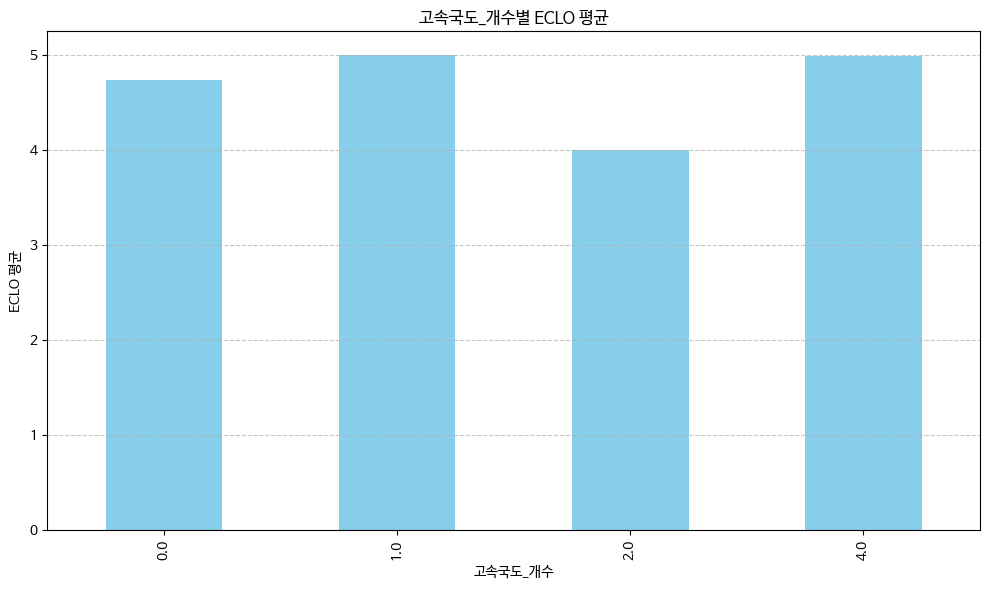

In [289]:
plt.figure(figsize=(10, 6))
train3.groupby('고속국도_개수')['ECLO'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('고속국도_개수')
plt.ylabel('ECLO 평균')
plt.title('고속국도_개수별 ECLO 평균')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


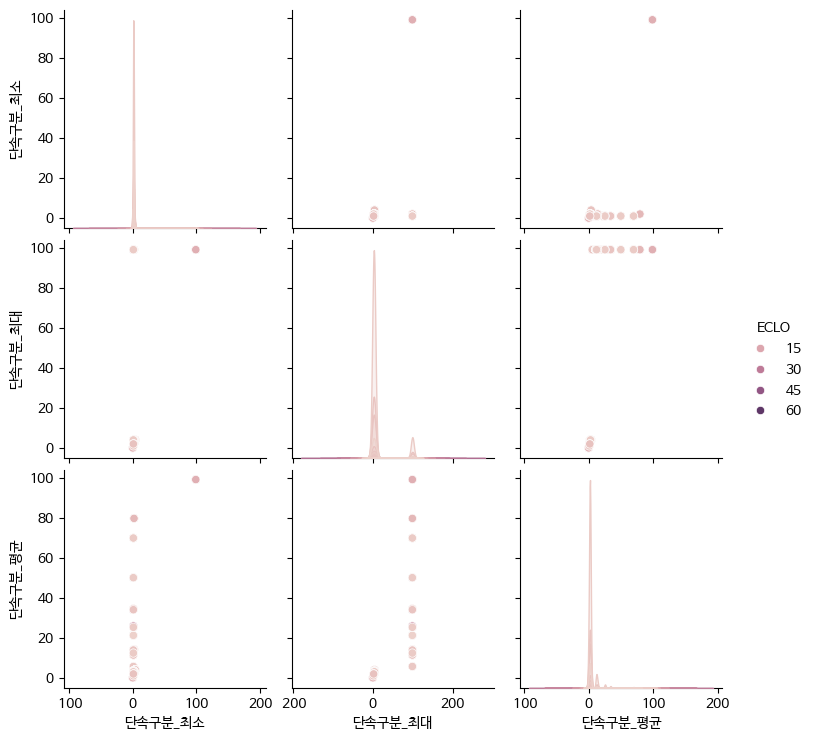

In [296]:
# ECLO와 다른 변수들 간의 관계를 시각화
sns.pairplot(train3, vars=['단속구분_최소', '단속구분_최대', '단속구분_평균'], hue='ECLO')
plt.show()

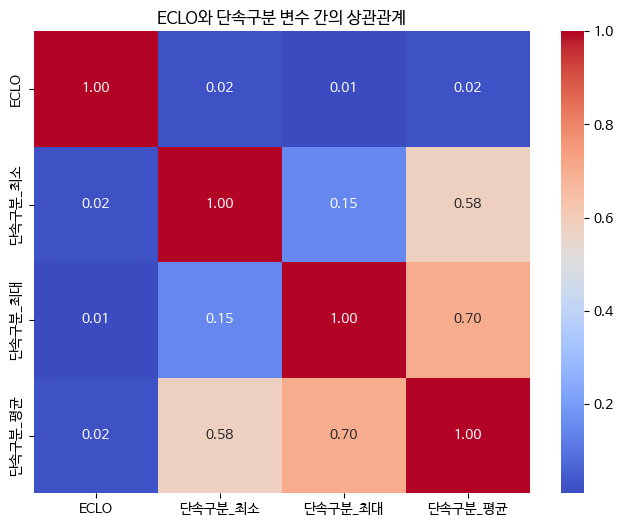

In [297]:
correlation_matrix = train3[['ECLO', '단속구분_최소', '단속구분_최대', '단속구분_평균']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('ECLO와 단속구분 변수 간의 상관관계')
plt.show()

In [308]:
df = train3['읍면동리'].value_counts()
merged_df = pd.merge(df, merged_df, on='읍면동리', how='left')

In [309]:
merged_df

,읍면동리,count,CCTV_Count,Speeding_Min,Speeding_Max,Speeding_Mean,Zone_Min,Zone_Max,Zone_Mean,Road_Direction_Min,Road_Direction_Max,Road_Direction_Mean,Expressway_Count
0,대명동,1710,62.0,1.0,4.0,3.016129,1.0,99.0,77.064516,1.0,3.0,2.290323,0.0
1,범어동,1156,12.0,1.0,2.0,1.666667,2.0,99.0,74.750000,1.0,2.0,1.416667,0.0
2,상인동,1121,30.0,1.0,99.0,12.366667,0.0,99.0,30.700000,1.0,3.0,2.033333,0.0
3,비산동,939,14.0,1.0,2.0,1.928571,2.0,99.0,78.214286,1.0,2.0,1.428571,0.0
4,내당동,922,8.0,2.0,2.0,2.000000,2.0,99.0,86.875000,1.0,2.0,1.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,장관동,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,신용동,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,동성로1가,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,평광동,1,1.0,99.0,99.0,99.000000,99.0,99.0,99.000000,1.0,1.0,1.000000,1.0
